In [2]:
library(tidyverse)
library(ggplot2)
library(tidymodels)
library(vroom)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.4.0     ✔ tune         1.3.0
✔ infer        1.0.7     ✔ workflows    1.2.0
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.3.0     ✔ yardstick    1.3.2
✔ recipes      1.1.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
bike_data <- read_csv("data/bike_data.csv")

Rows: 17379 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (15): season, yr, mnth, hr, holiday, weekday, workingday, weathersit, te...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
summary(bike_data)

     season            yr              mnth              hr       
 Min.   :1.000   Min.   :0.0000   Min.   : 1.000   Min.   : 0.00  
 1st Qu.:2.000   1st Qu.:0.0000   1st Qu.: 4.000   1st Qu.: 6.00  
 Median :3.000   Median :1.0000   Median : 7.000   Median :12.00  
 Mean   :2.502   Mean   :0.5026   Mean   : 6.538   Mean   :11.55  
 3rd Qu.:3.000   3rd Qu.:1.0000   3rd Qu.:10.000   3rd Qu.:18.00  
 Max.   :4.000   Max.   :1.0000   Max.   :12.000   Max.   :23.00  
    holiday           weekday        workingday       weathersit   
 Min.   :0.00000   Min.   :0.000   Min.   :0.0000   Min.   :1.000  
 1st Qu.:0.00000   1st Qu.:1.000   1st Qu.:0.0000   1st Qu.:1.000  
 Median :0.00000   Median :3.000   Median :1.0000   Median :1.000  
 Mean   :0.02877   Mean   :3.004   Mean   :0.6827   Mean   :1.425  
 3rd Qu.:0.00000   3rd Qu.:5.000   3rd Qu.:1.0000   3rd Qu.:2.000  
 Max.   :1.00000   Max.   :6.000   Max.   :1.0000   Max.   :4.000  
      temp           atemp             hum           wi

In [5]:
head(bike_data)

season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


In [6]:
sum(is.na(bike_data))

[1] 0

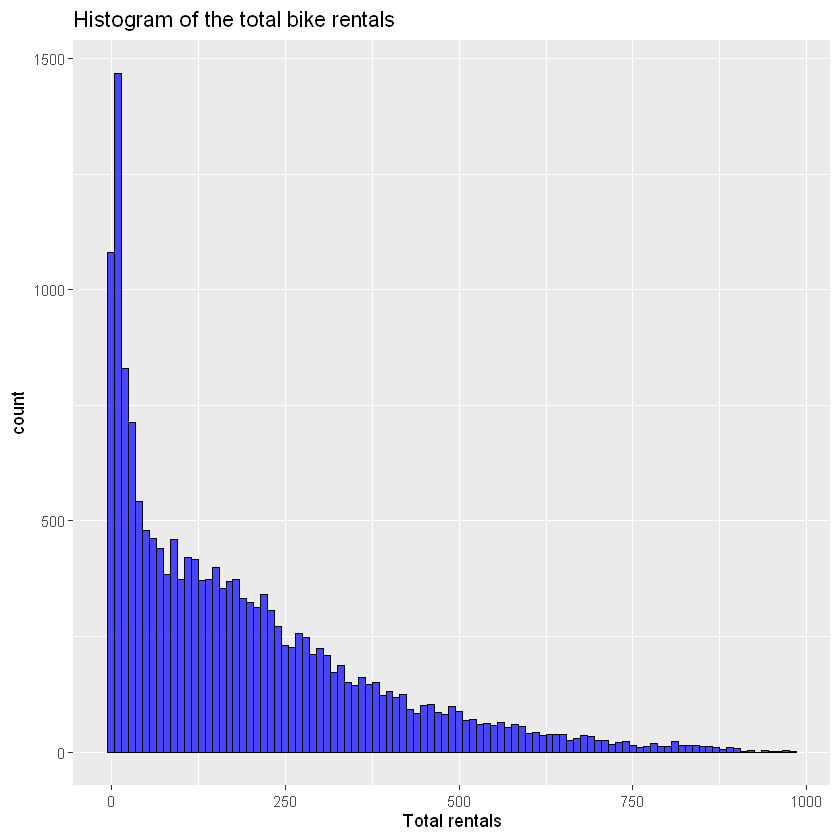

In [7]:
ggplot(bike_data,aes(x = cnt))+
geom_histogram(binwidth = 10, fill = "blue",color = "black",alpha = 0.7)+
labs(title = "Histogram of the total bike rentals", x = "Total rentals")

In [8]:
bike_data <- bike_data %>%
  mutate(across(c(season, yr, mnth, hr, holiday, weekday, workingday, weathersit), as.factor))


In [9]:
cor(bike_data %>% select(temp, atemp, hum, windspeed, casual, registered, cnt))


,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.00000000,0.98767214,-0.06988139,-0.02312526,0.45961565,0.33536085,0.40477228
atemp,0.98767214,1.00000000,-0.05191770,-0.06233604,0.45408007,0.33255864,0.40092930
hum,-0.06988139,-0.05191770,1.00000000,-0.29010490,-0.34702809,-0.27393312,-0.32291074
windspeed,-0.02312526,-0.06233604,-0.29010490,1.00000000,0.09028678,0.08232085,0.09323378
casual,0.45961565,0.45408007,-0.34702809,0.09028678,1.00000000,0.50661770,0.69456408
registered,0.33536085,0.33255864,-0.27393312,0.08232085,0.50661770,1.00000000,0.97215073
cnt,0.40477228,0.40092930,-0.32291074,0.09323378,0.69456408,0.97215073,1.00000000


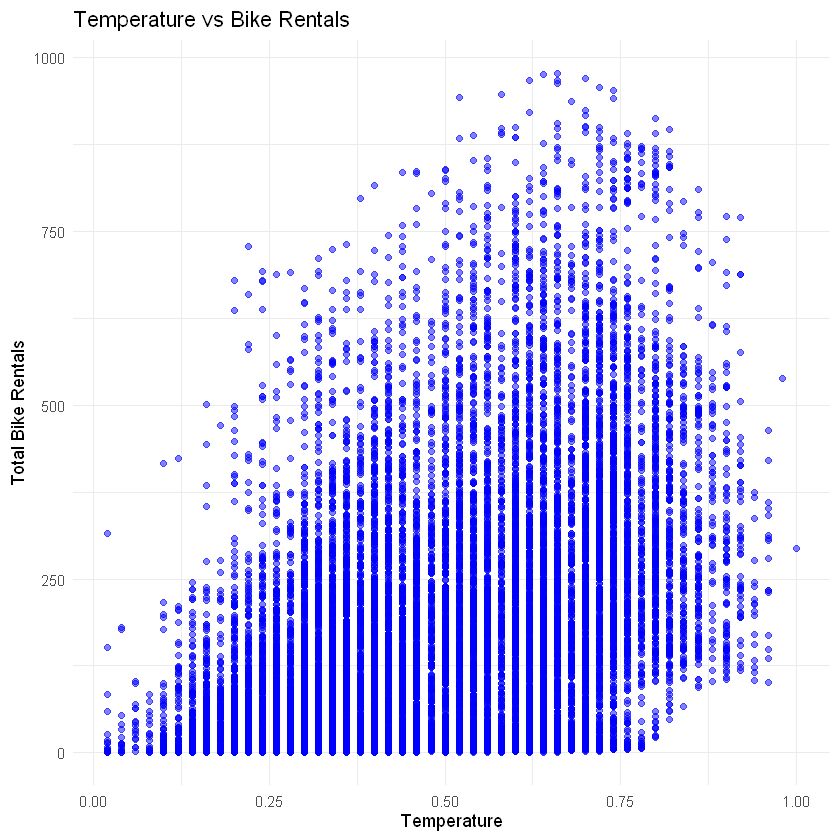

In [10]:
ggplot(bike_data, aes(x = temp, y = cnt)) +
  geom_point(color = "blue", alpha = 0.5) +
  theme_minimal() +
  labs(title = "Temperature vs Bike Rentals", x = "Temperature", y = "Total Bike Rentals")


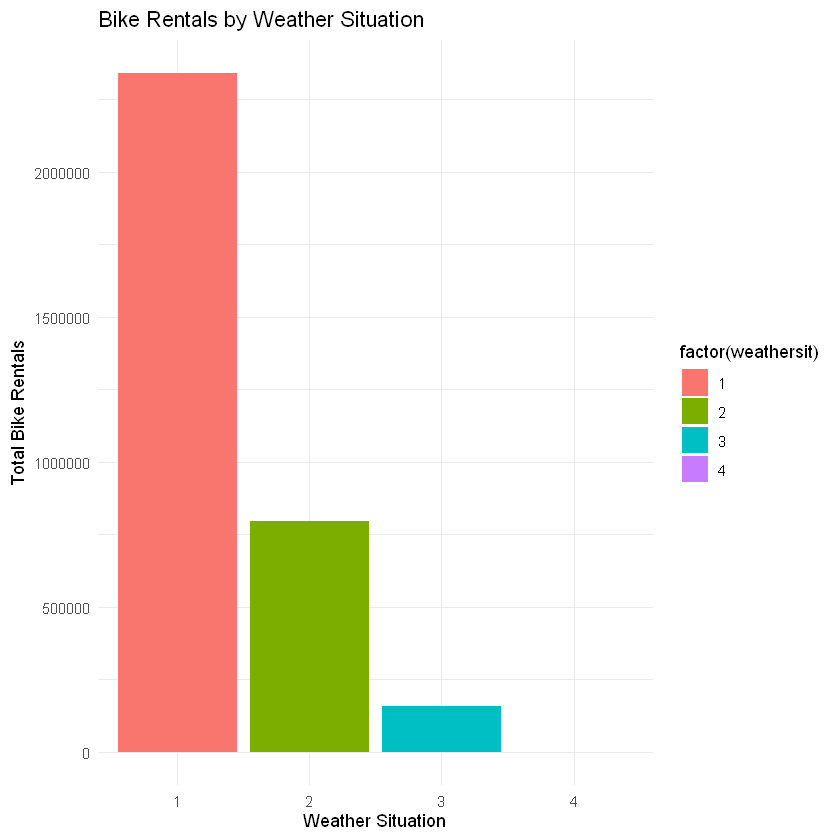

In [11]:
ggplot(bike_data, aes(x = factor(weathersit), y = cnt, fill = factor(weathersit))) +
  geom_bar(stat = "identity") +
  labs(title = "Bike Rentals by Weather Situation", x = "Weather Situation", y = "Total Bike Rentals") +
  theme_minimal()

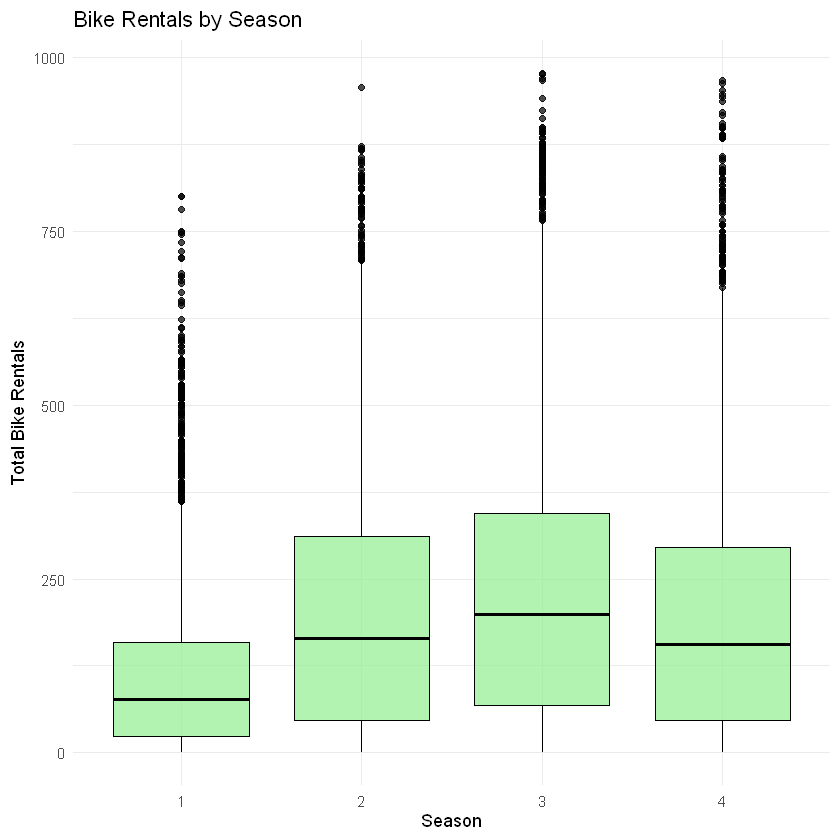

In [12]:
ggplot(bike_data, aes(x = factor(season), y = cnt)) +
  geom_boxplot(fill = "lightgreen", color = "black", alpha = 0.7) +
  theme_minimal() +
  labs(title = "Bike Rentals by Season", x = "Season", y = "Total Bike Rentals")


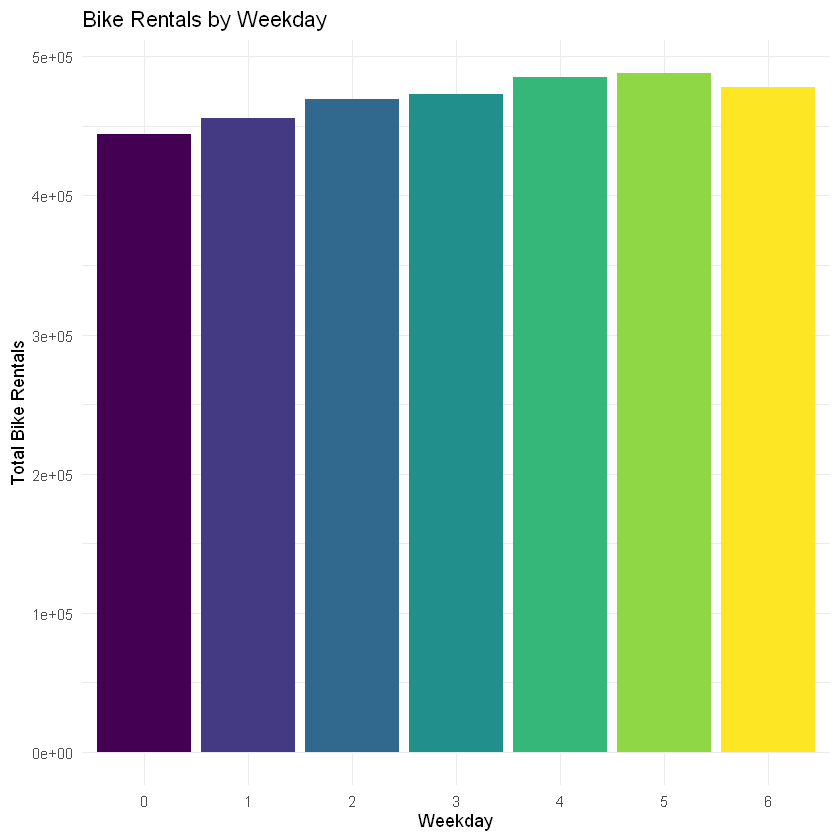

In [13]:
ggplot(bike_data, aes(x = factor(weekday), y = cnt, fill = factor(weekday))) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  scale_fill_viridis_d() +
  labs(title = "Bike Rentals by Weekday", x = "Weekday", y = "Total Bike Rentals") +
  theme_minimal()


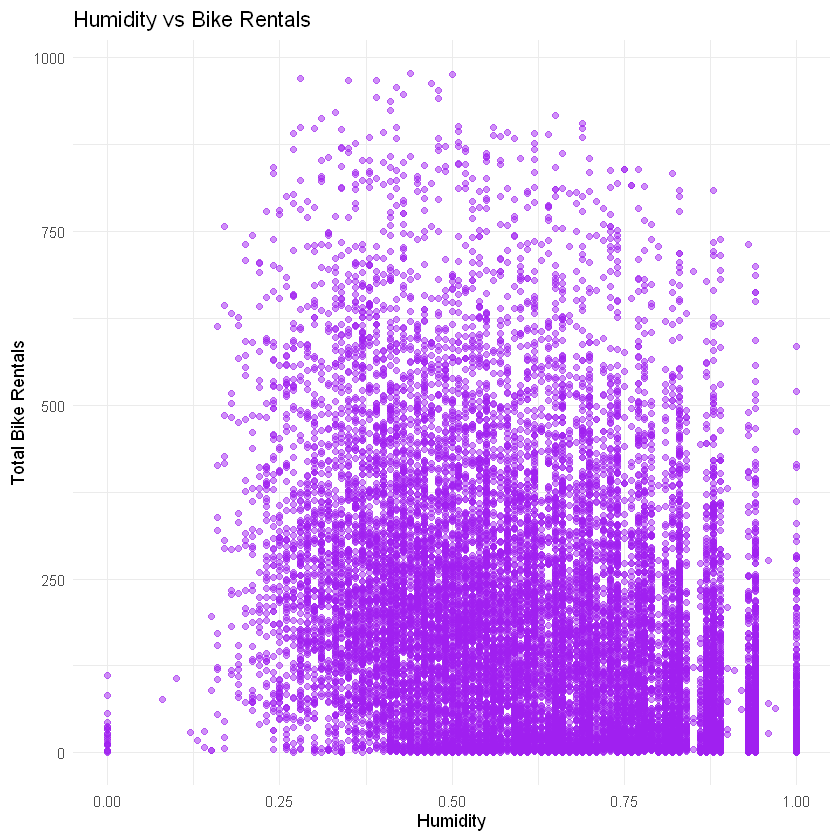

In [14]:
ggplot(bike_data, aes(x = hum, y = cnt)) +
  geom_point(color = "purple", alpha = 0.5) +
  theme_minimal() +
  labs(title = "Humidity vs Bike Rentals", x = "Humidity", y = "Total Bike Rentals")


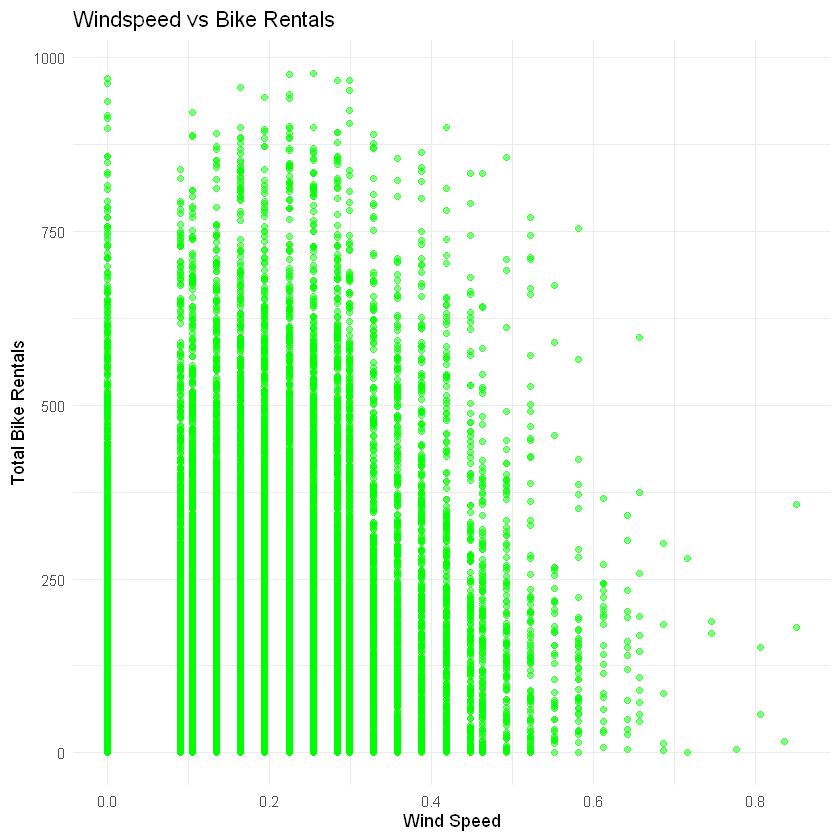

In [15]:
ggplot(bike_data, aes(x = windspeed, y = cnt)) +
  geom_point(color = "green", alpha = 0.5) +
  theme_minimal() +
  labs(title = "Windspeed vs Bike Rentals", x = "Wind Speed", y = "Total Bike Rentals")


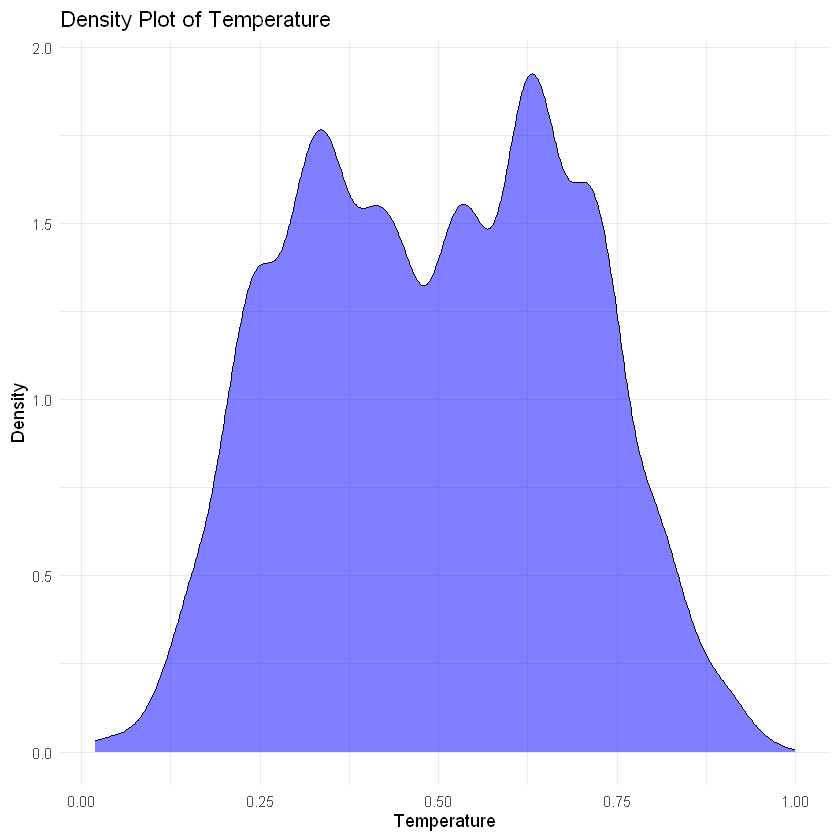

In [16]:
ggplot(bike_data, aes(x = temp)) +
  geom_density(fill = "blue", alpha = 0.5) +
  theme_minimal() +
  labs(title = "Density Plot of Temperature", x = "Temperature", y = "Density")


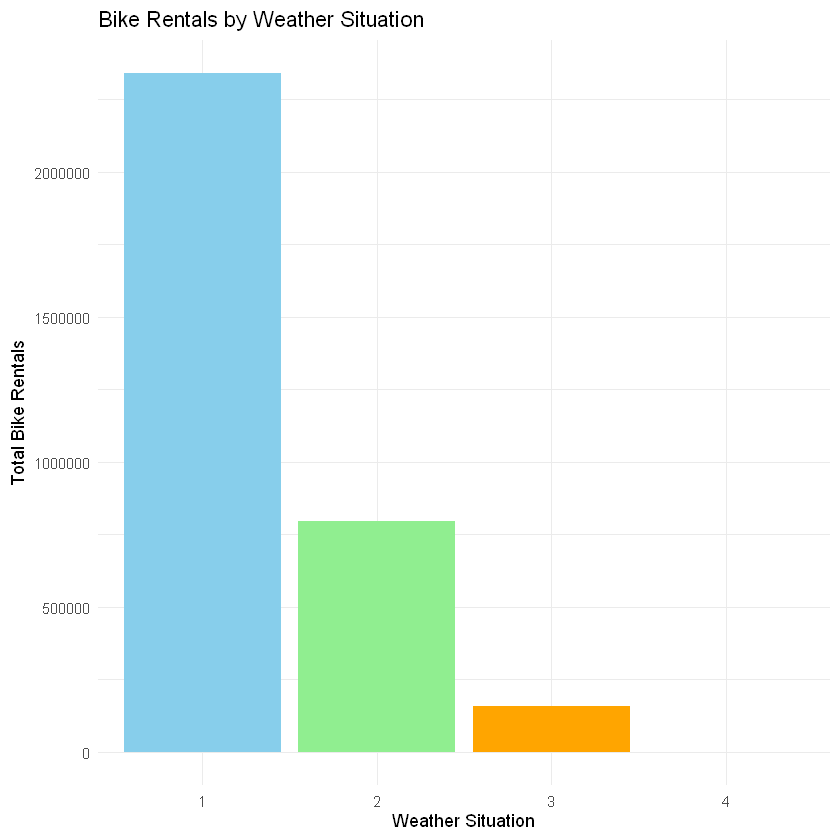

In [17]:
ggplot(bike_data, aes(x = factor(weathersit), y = cnt, fill = factor(weathersit))) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  scale_fill_manual(values = c("skyblue", "lightgreen", "orange", "red")) +
  labs(title = "Bike Rentals by Weather Situation", x = "Weather Situation", y = "Total Bike Rentals") +
  theme_minimal()


In [18]:
lm_model <- lm(cnt ~ temp + atemp + hum + windspeed + season + weathersit, data = bike_data)
summary(lm_model)



Call:
lm(formula = cnt ~ temp + atemp + hum + windspeed + season + 
    weathersit, data = bike_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-363.12 -102.14  -29.78   64.35  729.42 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  124.6208     6.7830  18.373  < 2e-16 ***
temp         315.2920    42.0101   7.505 6.43e-14 ***
atemp        155.5220    45.4834   3.419 0.000629 ***
hum         -288.1998     7.2347 -39.836  < 2e-16 ***
windspeed     39.6116    10.4802   3.780 0.000158 ***
season2       -0.6319     4.1576  -0.152 0.879204    
season3      -41.2095     5.3351  -7.724 1.19e-14 ***
season4       56.7347     3.6570  15.514  < 2e-16 ***
weathersit2   17.3784     2.8421   6.115 9.88e-10 ***
weathersit3   -2.0441     4.7458  -0.431 0.666672    
weathersit4  108.2867    88.7697   1.220 0.222534    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 153.6 on 17368 degrees of freedom
Multiple R-sq

R^2 value is 0.2832, means that the model explains 28.32% of the variation in bike rentals. 

Temperature variable has a positive impact on rentaks. A unit increase in temp leads to ~315 more rentals.

Humidity has negative impact on rentals, more humidity reduces ~288 per unit.

Season 3 decreases rental by ~41.2 compared to season 1.3 is fall, 1 is spring.

Season 4 increases rentals by ~56.7 compared to 1. 4 is winter.

The season2,weathersit3,weathersit4 do not affect much.

In [20]:
bike_data$residuals <- residuals(lm_model)


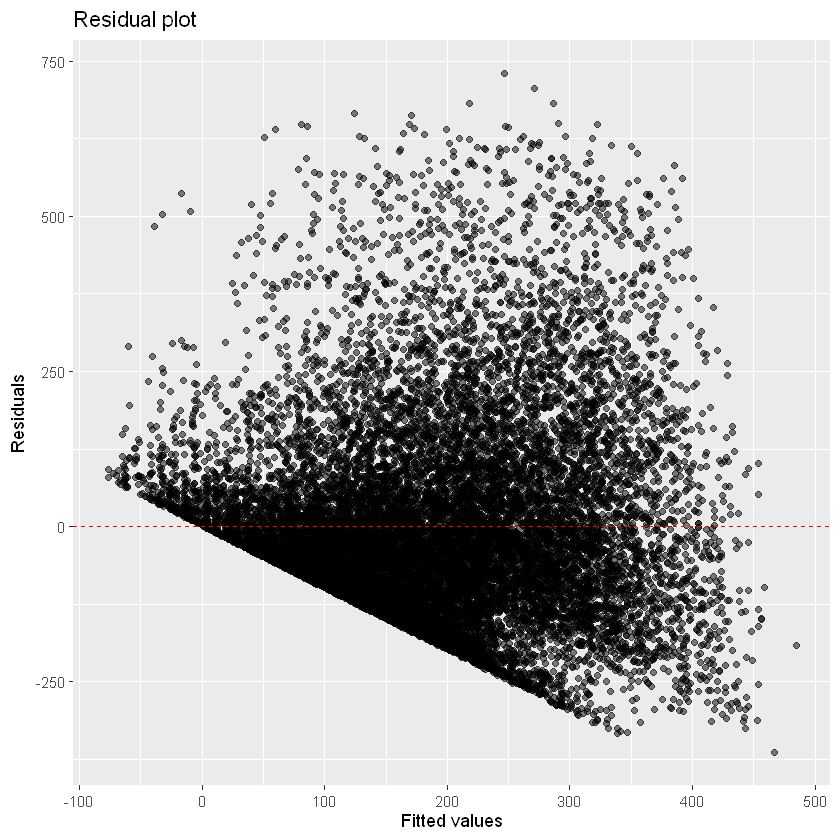

In [28]:
ggplot(bike_data,aes(x= fitted(lm_model),y = residuals(lm_model)))+
geom_point(alpha = 0.5)+
geom_hline(yintercept = 0,linetype = 'dashed',color = "red")+
labs(title = "Residual plot", x = "Fitted values", y = "Residuals")

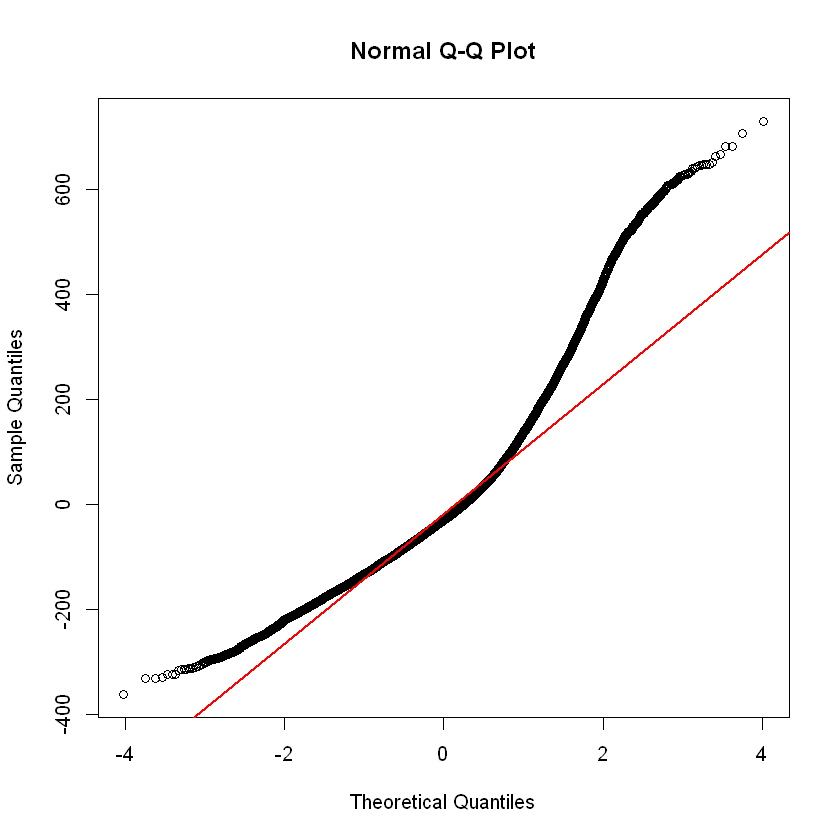

In [30]:
qqnorm(residuals(lm_model))
qqline(residuals(lm_model),col = "red",lwd = 2)